### MY470 Computer Programming

### Final Assignment, MT 2022

#### \*\*\* Due 12:00 noon on Monday, January 17, 2022 \*\*\*

---

## Fifteen Years of Women's Tennis

The final assignment asks you to use the computational thinking and programming skills you learned in the course to answer an empirical social science question. You are expected to apply the best practices and theoretical concepts we covered in the course to produce a program that not only returns the correct output but is also legible, modular, and reasonably optimized. The assignment assumes mastery of loops, conditionals, and functions, as well as awareness of issues related to runtime performance.

In honor of Emma Raducanu's historical achievements this year, we will study the results of womens' tennis matches over the period 2007-2021. Your objectives are to parse the data, reconstruct tournament brackets, identify the top players, and implement an algorithm to provide an alternative ranking for the players.

**NOTE: You are only allowed to use fundamental Python data types (lists, tuples, dictionaries, numpy.ndarray, etc.) to complete this assignment.** You are not allowed to use advanced data querying and data analysis packages such as pandas, sqlite, networkx, or similar. We impose this restriction in order to test your grasp of fundamental programming concepts, not your scripting experience with Python libraries you acquired from prior work or other courses. 

#### Hints

Although this assignment is quite streamlined, imagine that the tasks here are part of a larger project. How would you structure your program if in the future you may need to use a different dataset with similar structure, manipulate the data somewhat differently, add additional analyses, or modify the focus of the current analysis?  

Keep different data manipulations in separate functions/methods and group related functions/classes in separate `.py` files. Name your modules in an informative way.

Using an object-oriented approach to solve the problems is entirely optional and you will not obtain bonus points for this. If you are not confident in your programming skills, we recommend developing your solution with functions only.

### Data

You will find the data in the repository [https://github.com/lse-my470/assignment-final-data.git](https://github.com/lse-my470/assignment-final-data.git). Please clone the data repository in the same directory where you clone the repository `assignment-final-yourgithubname`. Keep the name for the data folder `assignment-final-data`. Any time when you refer to the data in your code, please use a relative path such as `'../assignment-final-data/filename.csv'` instead of an absolute path such as `'/Users/myname/Documents/my470/assignment-final-data/filename.csv'`. This way, we will be able to test your submission with our own copy of the data without having to modify your code.

The repository contains fifteen `.csv` files with match results, one file for each year. Each file contains the following variables:

* Tournament – the name of the tournament that the match was part of.
* Start date – the date when the tournament starts.
* End date – the date when the tournament ends.
* Best of – 3 means that first player to win 2 sets wins match (all WTA matches are best of 3 sets).
* Player 1, Player 2 – names of the players in the match.
* Rank 1, Rank 2 – WTA ranks of Player 1 and Player 2 before the start of the tournament. Not all players will have a ranking.
* Set 1-3 – result for each set played where the score is shown as: number of games won by Player 1 - number of games won by Player 2. The player that wins the most games in a set wins that set.
* Comment
  * Completed means match was played.
  * Player retired means that the named player withdrew and the other player won by default.

#### Hints

When writing your code, test it on a small "toy dataset", instead of the entire data. This way, you won't need to wait for minutes/hours just to find out that you have a syntax error!

You should not modify the original data in any way. If your code creates new data files, you should save them in the directory where this file resides. 

You should consider whether and which estimates to save on disk to speed up queries, instead of calcualting them again and again from the raw data. If you decide to do so, please write your code to save any such files with processed data in the directory where this file resides. This way, we can run your code without having to alter it. Think about what is the most efficient way, both in terms of time and space, to save the data.

### 1. Reconstructing the tournaments

Tournaments in tennis are typically in knockout format. In each round there are several pairs of fixtures, the winners of each match advance to the next round and the losers are eliminated. The winners then proceed to the next round and the process continues until two players contest the final. Typically, the rounds in the competition go as follows: \[`First Round`, `Second Round`, ...,\] `Quarterfinals`, `Semifinals`, `Final`.

In some cases, tournaments have a `Round Robin` (also known as all-play-all) group stage, meaning that each player in a group plays against each other player in turn. There are usually two parallel groups with 4 players in each. The top player(s) (i.e. those who won the most matches) in each group advance to a short knockout stage (typically just Semifinals and Final). These tournaments are:

* Sony Ericsson Championships 2007-2015
* Commonwealth Bank Tournament of Champions 2009
* Qatar Airways Tournament of Champions Sofia 2012
* Garanti Koza WTA Tournament of Champions 2013-2014
* BNP Paribas WTA Finals 2016-2018
* WTA Elite Trophy 2015-2019
* WTA Finals 2019, 2021

Very occasionally, tournaments also include a `Third Place` match too.

Your task is to identify the winner in each match and the round in which the match was played. To check your work, please call the procedures you have writen to print the answers to the following questions:

* Who won the final of the 2021 Women's US Open?
* Who played against whom in the 4th Round of the 2018 French Open? 
* In which round was Venus Williams eliminated in the 2011 Australian Open?
* How many finals has Naomi Osaka played in until now?
* How many times have Venus and Serena Williams played against each other and how many of these matches each won?

### 2. Winners win

One simple and naive way to rank players is to count how many matches they won each year. Write a procedure that estimates this. Then print the three top ranked players for the year 2021 and for the period 2007-2021, together with the total number of matches they won. Higher scores are better, so ranking is the reversed order of most matches won.


### 3. Winners don't lose

A more sophisticated ranking algorithm will account for the fact that some players may play fewer games (e.g., due to an injury) and that wins in later stages of a tournament (e.g., in the final and semi-final compared to earlier rounds of the competition) are more important. Write another procedure that estimates a player's rank by adding `r` points for every win and subtracting `1/r` for every loss, where `r = 1` for the lowest elimination round of the tournament, `r = 2` for the next round of the tournament, and so on. In other words, `r` starts at 1 and increases for every next elimination round. This way, winning larger competitions brings more points (they have more elimination rounds), wins in later rounds improve one's rank more, and losses in earlier rounds diminish one's rank more. For round-robin stage matches, assume that `r = 1`. 

Use this measure to print the three top ranked players for the year 2021 and for the period 2007-2021, together with their scores.


### 4. Winners beat other winners (WbW)

Another idea for ranking players is that winning over better players should count more. However, how we measure a good player depends on whether they beat other good players, so we get into a recursive situation. Do not worry, you will not have to write a recursive procedure here as every recursive solution can be rewritten as iteration! This is what we will do:

1. First, count all the players in the given data and assign each a score of 1/n, where n is the number of unique players.

2. Then, repeatedly do the following sequence of steps:
    1. Each player divides its current score equally among all the matches they have lost and passes these shares onto the players they lost to. If the player never lost, then they pass their current score to themselves. If the player lost two times to a specific individual, then they pass two shares to that individual.   
    2. Each player updates their score to be the sum of the shares they receive.    
    3. Rescale the score of each player by multiplying it by 0.85 and adding 0.15/n.
    
3. Repeat the procedure until adjustments are too small to matter. You may need to come up with modifications of the algorithm or the data if the algorithm cannot converge or produces non-sensical results in specific situations.

This algorithm essentially starts with a world in which everyone is equally important and then starts to "pass importance" iteratively to the winners until an equilibrium is reached.

Use this measure, which we will call WbW, to print the three top ranked players for the year 2021 and for the period 2007-2021, together with their scores. 


### 5. Compare your WbW ranking measure

In fact, the data already contain the players' official WTA rank in the variables Rank1 and Rank2, which follows its own [complex procedure](https://en.wikipedia.org/wiki/WTA_Rankings). How well does your WbW ranking correlate with the WTA ranking over time? 

Use the data from 2007 to estimate the players' WbW ranking at the end of this year. This will give you sufficient data to initialize your estimate. 

Then, starting with 2008, update your ranking before the start of each tournament, based only on results from tournaments completed in the previous 52 weeks. Use a scatter plot from `matplotlib` to plot the players' WTA ranking on the x-axis against your WbW ranking calculated before the start of the same tournament on the y-axis. If an individual's WTA ranking changes mid-tournament (rare), take their first listed ranking within that tournament. Each point on the plot should be a player's ranking before the start of each tournament for each tournament they participated in from 2008 until now. So the number of points to plot will be the number of unique individuals that took part in each tournament for all tournaments during that period.

Write a couple of sentences to note what you observe. You will not be marked for your observations but some reflection is important as it could help you identify problems with your code, for example.


## Import and run your code here

Keep your code in separate `.py` files and then import it in the code cell below. Then call the functions/methods you need to conduct the analysis described above and print the requested outputs. We should be able to run the cell below to calculate again the results and get the requested output, without having to modify your code in any way. 

In [4]:
# Import modules to estimate and show results
import pickle
from utils import data_reconstruction # py file for question 1
from utils import ww_rank # py file for question 2
from utils import wdl_rank # py file for question 3
from utils import wbw_rank # py file for question 4

with open ('dataset', 'rb') as fr: #rb means read bites
    dataset = pickle.load(fr)

# Question 1 answers
data_reconstruction.who_won_final(dataset, "US Open", 2021)
data_reconstruction.who_played_who(dataset, "French Open", 2018, 4)
data_reconstruction.which_round(dataset, "Williams V.", "Australian Open", 2011)
data_reconstruction.round_played(dataset, "Osaka N.", "Final")
data_reconstruction.two_players_games(dataset, "Williams V.", "Williams S.")

# Question 2 answers
print("\nWinners win (WW) ranking:")
period = [date for date in range(2007,2022)]
rank_2007_2021 = ww_rank.winners_win(dataset, period, printer=True)
rank_2021 = ww_rank.winners_win(dataset, 2021, printer=True) 

# Question 3 answers
print("\nWinners don't lose (WdL) ranking:")
winners_dl_2007_2021 = wdl_rank.winners_dont_lose(dataset, period, printer=True)
winners_dl_2021 = wdl_rank.winners_dont_lose(dataset, 2021, printer=True)

# Question 3 answers
print("\nWinners beat other winners (WBW) ranking:")
wbw_2007_2021 = wbw_rank.wbw_ranking(dataset, period, 5, 0, printer=True)
wbw_2021 = wbw_rank.wbw_ranking(dataset, 2021, 5,0, printer=True)


The winner of the 2021 US Open is Raducanu E.

The confrontations for the round 4 of the 2018 French Open are:
['Buzarnescu M.', 'Keys M.']
['Strycova B.', 'Putintseva Y.']
['Stephens S.', 'Kontaveit A.']
['Mertens E.', 'Halep S.']
['Kasatkina D.', 'Wozniacki C.']
['Kerber A.', 'Garcia C.']
['Williams S.', 'Sharapova M.']
['Tsurenko L.', 'Muguruza G.']


Williams V. was eliminated from the 2011 Australian Open at the round 3


Osaka N. played 10 Final


Williams V. played against Williams S. 18 times and Williams V. won 6 of these games and Williams S. won 12 of these games.

Winners win (WW) ranking:

The top three players for the given period are:
Player:  Wozniacki C.  Score:  591
Player:  Williams S.  Score:  514
Player:  Radwanska A.  Score:  501

The top three players for the given period are:
Player:  Kontaveit A.  Score:  49
Player:  Jabeur O.  Score:  48
Player:  Sabalenka A.  Score:  44

Winners don't lose (WdL) ranking:

The top three players for the given period are:
Player

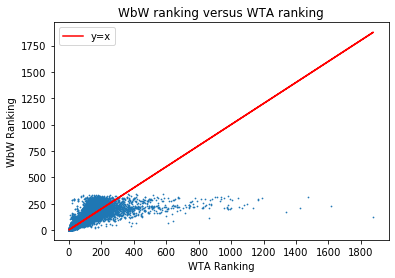

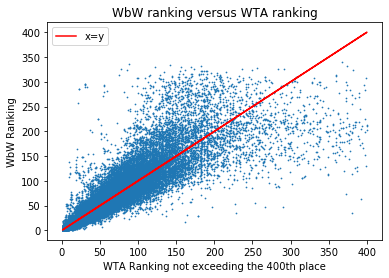

255


In [2]:
# Question 5 answers

from utils import wbw_performance # py file for question 5
import matplotlib.pyplot as plt

with open ('dataset', 'rb') as fr: #rb means read bites
    dataset = pickle.load(fr)
    
points = wbw_performance.wbw_comparison(dataset)

# Plotting obtain results:
x = [] # x coordinates
y = [] # y coordinates
for i in range(len(points)):
    x.append(points[i][0])
    y.append(points[i][1])

plt.scatter(x, y, s=0.5) # producing scatter plot
plt.xticks([x for x in range(0, 2001, 200)]) # setting x axis scale
plt.title("WbW ranking versus WTA ranking") # title of plot
plt.xlabel("WTA Ranking") # labelling x axis
plt.ylabel("WbW Ranking") # labelling y axis
plt.plot(x, x, label='y=x', color='r') # adding the straight line with equation y=x
plt.legend() # adding the legends
plt.show()

# We can see that some players have a WTA Ranking that largely exceeds the 400th place, while our algorithm
# never outputs a ranking place above the 400th place. Indeed, our algorithm only considers the past tournaments
# that occurred within a 52-weeks time period, and, we rarely have over 400 players playing in this time window.
# Hence, based on our WbW ranking, the last player rank will rarely exceed the 400th place, and as a result, our
# algorithm tends to overestimate the ranking position of WTA low-ranked players.
# Despite this bias, to assess how well our algorithm correlate to the WTA ranking, we have to compare the
# distance of the points with the "y=x" line. The closer the points are to this line, the closer our WbW rank is to
# WTA rank. However, we can't clearly see the dispersion of the points when we include WTA ranks that exceed the 400th
# place. Therefore, to better visualize our algorithm performance, let's plot the data points, without the WTA ranks
# that exceeds the 400th place.

# Plotting the data points without the WTA ranks that exceeds the 400th place:
x_1 = []
y_1 = []
extreme_points = 0 # counter of how many data points removed

for i in range(len(points)):
    if points[i][0] <= 400:
        x_1.append(points[i][0])
        y_1.append(points[i][1])
    elif points[i][0] > 400:
        extreme_points += 1

plt.scatter(x_1, y_1, s=0.5)
plt.xlabel("WTA Ranking not exceeding the 400th place")
plt.ylabel("WbW Ranking")
plt.title("WbW ranking versus WTA ranking")
plt.plot(x_1, x_1, label='x=y', color='r')
plt.legend()
plt.show()

print(extreme_points) # obtaining number of removed data points

# After having removed 255 data points, we can now have a better understanding on how our algorithm performed.
# First, we can see that for attributing the first 200 places, our algorithm did pretty well, indeed we can see a quite
# strong linear relationship around the "y=x" line for points having x and y coordinates between 1 and 200
# approximately. Secondly, after exceeding the attribution of the first 200 places, the points' dispersion is much
# higher which implies that our WbW ranking have a poor correlation with WTA ranking when we exceed the attribution of
# the first 200 places. To conclude, our WbW algorithm tends to be better at ranking top-players between the first and
# the 200th place according to the WTA ranking, once this range is exceeded, the algorithm accuracy decreases
# significantly. Indeed, it overestimates some players ranking and underestimates some other players' ranking.



In [8]:

for y, t in [(2017, 'J&T Banka Prague Open'),
            (2021, 'WTA Finals'),
            (2019, 'WTA Finals'),
            (2009, 'Sony Ericsson Championships'),
            (2015, 'WTA Elite Trophy'),
            (2016, 'WTA Elite Trophy'),
            (2010, 'Commonwealth Bank Tournament of Champions')]:
    print('\n', y, t)
    print('\n'.join(['\t'.join((str(x[-2]), x[3], x[4]))
                     for x in dataset if (x[0]==t)&(x[1].year==y)][::-1]))
    


 2017 J&T Banka Prague Open
6	Barthel M.	Pliskova Kr.
5	Ostapenko J.	Pliskova Kr.
4	Ostapenko J.	Konjuh A.
4	Strycova B.	Barthel M.
3	Pliskova Kr.	Haddad Maia B.
3	Strycova B.	Siniakova K.
3	Giorgi C.	Barthel M.
2	Vondrousova M.	Konjuh A.
2	Wozniacki C.	Ostapenko J.
2	Strycova B.	Hradecka L.
2	Haddad Maia B.	Stosur S.
2	Pliskova Kr.	Safarova L.
2	Siniakova K.	Vikhlyantseva N.
2	Wang Q.	Giorgi C.
2	Dodin O.	Barthel M.
1	Safarova L.	Kucova K.
1	Konjuh A.	Cepelova J.
1	Ostapenko J.	Tsurenko L.
1	Siniakova K.	Kovinic D.
1	Jankovic J.	Pliskova Kr.
1	Zhang S.	Barthel M.
1	Golubic V.	Vikhlyantseva N.
1	Goerges J.	Strycova B.
1	Linette M.	Hradecka L.
1	Rodina E.	Stosur S.
1	Haddad Maia B.	Mchale C.
1	Wozniacki C.	Doi M.
1	Wang Q.	Sakkari M.
1	Giorgi C.	Pliskova Ka.
1	Beck A.	Dodin O.
1	Witthoeft C.	Vondrousova M.

 2021 WTA Finals
3	Kontaveit A.	Muguruza G.
2	Sakkari M.	Kontaveit A.
2	Badosa P.	Muguruza G.
1	Sakkari M.	Sabalenka A.
1	Badosa P.	Swiatek I.
1	Kontaveit A.	Muguruza G.
1	Pliskova 

In [7]:
dataset[0]

['AEGON Classic',
 datetime.date(2009, 6, 8),
 datetime.date(2009, 6, 14),
 'Ditty J.',
 'Cavaday N.',
 '120.0',
 '297.0',
 '2-6',
 '6-7',
 '',
 'Completed',
 'Cavaday N.',
 1,
 1]

---

### Evaluation

| Aspect  | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   15/15    |   Great   
| 2       |   5/5     |   Good
| 3       |   10/10    | Great
| 4       |   9/10    | Scores are slightly off, be good effort!
| 5       |   10/10     | Great
| Legibility     |   8/10    | You can improve legibility by creating variables pointing to indexed items, instead of indexing every time. Docstrings should also have shorter lines.
| Modularity     |   8/10    | You should place the plotting code in a function and module. Gernally, modules should not include code that runs on import.
| Optimization   |   20/30    | Good but do really need to save the data locally? It doesn't seem to improve the performance much. Otherwise good! Also your algorithm relies on match ordering.
|**Total**|  **85/100**  | Well done!
